<a href="https://colab.research.google.com/github/sftSalman/-Image-compression-using-K_mean_clusturing/blob/main/MNIST_autoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def map_image(image, label):
  """Normalizes and flatten the images. Returns image as input and label."""
  image = tf.cast(image, dtype=tf.float32)
  image /= 255.0
  image = tf.reshape(image, shape=(784,))
  return image, image

In [3]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load("mnist", as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset  = tfds.load("mnist", as_supervised=True, split="test")
test_dataset  = test_dataset.map(map_image)
test_dataset  = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
def simple_autoencoder(inputs):
  """Builds the encoder and decoder using Dense layers"""
  encoder = tf.keras.layers.Dense(units=32, activation="relu")(inputs)
  decoder = tf.keras.layers.Dense(units=784, activation="sigmoid")(encoder)
  return encoder, decoder


In [5]:
inputs = tf.keras.layers.Input(shape=(784,))

In [8]:
encoder_output, decoder_output = simple_autoencoder(inputs)

In [10]:
#visualize its output later
encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output)

In [11]:
autoencoder_model = tf.keras.Model(inputs=inputs, outputs=decoder_output)

In [12]:
autoencoder_model = tf.keras.Model(inputs=inputs, outputs=decoder_output)

In [13]:
autoencoder_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="binary_crossentropy"
)

In [14]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = autoencoder_model.fit(train_dataset,
                                            steps_per_epoch=train_steps,
                                            epochs=25)

Epoch 1/25
468/468 [==============================] - 10s 20ms/step - loss: 0.2295
Epoch 2/25
468/468 [==============================] - 6s 13ms/step - loss: 0.1429
Epoch 3/25
468/468 [==============================] - 6s 13ms/step - loss: 0.1194
Epoch 4/25
468/468 [==============================] - 6s 13ms/step - loss: 0.1075
Epoch 5/25
468/468 [==============================] - 6s 13ms/step - loss: 0.1011
Epoch 6/25
468/468 [==============================] - 6s 13ms/step - loss: 0.0975
Epoch 7/25
468/468 [==============================] - 6s 13ms/step - loss: 0.0958
Epoch 8/25
468/468 [==============================] - 6s 13ms/step - loss: 0.0948
Epoch 9/25
468/468 [==============================] - 6s 13ms/step - loss: 0.0944
Epoch 10/25
468/468 [==============================] - 6s 14ms/step - loss: 0.0941
Epoch 11/25
468/468 [==============================] - 6s 13ms/step - loss: 0.0938
Epoch 12/25
468/468 [==============================] - 6s 13ms/step - loss: 0.0937
Epoch 13/25


In [15]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  """Display sample outputs in one row."""
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')

In [16]:
def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8, 4)):
  """Display the input, encoded, and decoded output values."""
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28, 28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28, 28,))

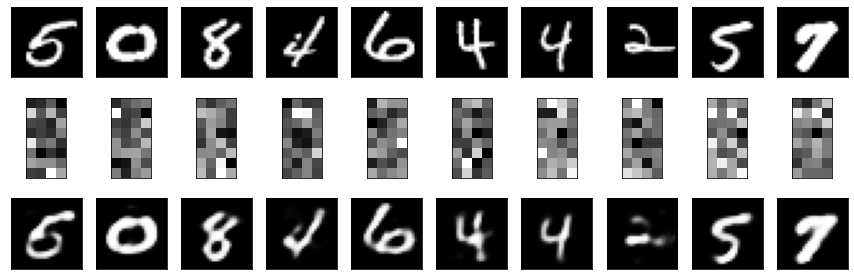

In [17]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])